# Case Study: Data-Driven Business Decisions
The project's objective is to increase online store revenue by prioritizing hypotheses to improve website performance, followed by analyzing A/B test results to determine which strategies are most effective for revenue growth.

Index
1. Data Dictionary
2. Importing Data
3. Data Preprocessing
    - df_hypotheses_us
        - Verifying Missing Values (None Found)
        - Verifying Duplicates (None Found)
    - df_orders_us
        - Verifying Missing Values (None Found)
        - Verifying Duplicates (None Found)
    - df_visits_us
        - Verifying Missing Values (None Found)
        - Verifying Duplicates (None Found)
4. Hypothesis Prioritization
    - ICE Framework
    - RICE Framework
5. A/B Testing Results
    1. Cumulative Revenue by Group Visualization
    2. Average Cumulative Order Size by Group Visualization
    3. Relative Difference in Average Cumulative Order Size
    4. Conversion Rate Calculation (Orders-to-Visits Ratio & Daily Conversion Rates)
    5. Relative Difference in Cumulative Conversion Between Groups A and B
    6. 95th and 99th Percentiles of Orders per User & Anomaly Detection Threshold
    7. Order Price Distribution (Scatter Plot)
    8. 95th and 99th Percentiles of Order Prices & Anomaly Detection Threshold
    9. Statistical Significance of Conversion Rate Difference (Raw Data)
    10. Statistical Significance of Average Order Size Difference (Raw Data)
    11. Statistical Significance of Conversion Rate Difference (Filtered Data)
    12. Statistical Significance of Average Order Size Difference (Filtered Data)
    13. Test Results and Decision Making


Aqui está um chacklist que pode usar quando você estiver preparando relatórios no Jupyter Notebook:

    Se você estiver enviando um arquivo ipynb, certifique-se de anexar os dados de origem.

    Se estiver enviando um arquivo HTML, certifique-se de que todas as células estejam preenchidas corretamente para que apareçam as tabelas e o gráfico.

    Especifique a finalidade do arquivo em uma célula markdown.

    Marque os passos principais. Indique onde os dados são pré-processados, onde as questões são colocadas e onde as principais descobertas são apresentadas.

    Insira um índice no início do arquivo.

    Liste os principais resultados e constatações; isso ajudará os leitores a encontrar rapidamente as respostas para suas perguntas.
    
    Deixe comentários no código, certificando-se de indicar o significado e a função de cada variável.

### Data Dictionary:
- **hypotheses_us**:
  - **Hypotheses** — Brief descriptions of the hypotheses
  - **Reach** — User reach, on a scale from 1 to 10
  - **Impact** — Impact on users, on a scale from 1 to 10
  - **Confidence** —  Confidence in the hypothesis, on a scale from 1 to 10
  - **Effort** — Resources required to test a hypothesis, on a scale from 1 to 10. The higher the Effort value, the more resources are needed for the test
  
- **orders_us**:
  - **transactionId** — Order identifier
  - **visitorId** — Identifier of the user who placed the order
  - **date** — Order date
  - **revenue** — Revenue from the order
  - **group** — The A/B test group to which the user belongs

- **visits_us**:
  - **date** — Date
  - **group** —  A/B test group
  - **visits** — Number of visits on the specified date for the specified A/B test group

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

plt.style.use('seaborn-deep')

In [2]:
# Defining the file path
path = 'data\\'

# Loading the 'hypotheses_us.csv' file into the DataFrame
df_hypotheses_us = pd.read_csv(path + 'hypotheses_us.csv', sep=';')

# Loading the 'orders_us.csv' file into the DataFrame
df_orders_us = pd.read_csv(path + 'orders_us.csv')

# Loading the 'visits_us.csv' file into the DataFrame
df_visits_us = pd.read_csv(path + 'visits_us.csv')

## 1. Data Cleaning and Preprocessing  
In this step, each dataframe (df) will be reviewed individually to understand its structure. This includes verifying column names, checking for null values, identifying duplicates, and ensuring the correct data types for each dataframe.

#### df_hypotheses_us

In [3]:
# Displaying the first 5 rows of the dataset to check if it loaded correctly
df_hypotheses_us.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [4]:
# Displaying information about the DataFrame
df_hypotheses_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
# Standardizing column names
df_hypotheses_us.columns = df_hypotheses_us.columns.str.strip().str.lower().str.replace(' ', '_')

# Verifying changes
df_hypotheses_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [6]:
# Checking for duplicate rows in df_orders_us
print("Duplicate rows:", df_hypotheses_us.duplicated().sum())

Duplicate rows: 0


**Conclusions**:
- It was observed that the separators were not standardized. Therefore, the first step was to standardize them during the data loading stage. Next, column names were standardized to snake_case, with no missing or duplicate values found, and data types confirmed as correct.

#### df_orders_us

In [7]:
# Printing the first rows of the DataFrame
df_orders_us.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [8]:
# Printing information about the DataFrame
df_orders_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [9]:
# Standardizing column names
df_orders_us.columns = df_orders_us.columns.str.strip().str.lower().str.replace(' ', '_')

# Verifying changes
df_orders_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionid  1197 non-null   int64  
 1   visitorid      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [10]:
# Checking for duplicate rows
print("Duplicate rows:", df_orders_us.duplicated().sum())

Duplicate rows: 0


In [11]:
# Converting 'date' column to datetime
df_orders_us['date'] = df_orders_us['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# Verifying changes
df_orders_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


**Conclusions**: 
- The first column name was not in the standard format, so all column names were standardized to snake_case. Additionally, no missing or duplicate values were found, and data types were correct, except for the 'date' column, which was converted to datetime.

#### df_visits_us

In [12]:
# Printing the first rows of the DataFrame
df_visits_us.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
# Printing information about the DataFrame
df_visits_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
# Checking for duplicate rows
print("Duplicate rows:", df_orders_us.duplicated().sum())

Duplicate rows: 0


In [15]:
# Converting 'date' column to datetime
df_visits_us['date'] = df_visits_us['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# Verifying changes
df_visits_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


**Conclusions**: 
- It was observed that the column names were already in the standard format. Additionally, no missing or duplicate values were found, and the data types appear to be correct, except for the 'date' column, which was converted to the datetime type.

## 2. Application of ICE and RICE Frameworks to Prioritizing Hypotheses
To demonstrate my ability to apply different prioritization methods, I used both the ICE (Impact, Confidence, Effort) and RICE (Reach, Impact, Confidence, Effort) frameworks to prioritize hypotheses.

In [16]:
# Printing 03 rows of the DataFrame
df_hypotheses_us.sample(3)

,hypothesis,reach,impact,confidence,effort
7,Add a subscription form to all the main pages....,10,7,8,5
0,Add two new channels for attracting traffic. T...,3,10,8,6
2,Add product recommendation blocks to the store...,8,3,7,3


1. **ICE Framework**:
The ICE framework was applied first to quickly assess the potential impact, confidence, and effort of implementation for each hypothesis. Each hypothesis was scored based on these three factors. This gave a simple prioritization of hypotheses.

In [17]:
# Applying the ICE framework to prioritize hypotheses in descending order

# Creating a new "ICE" column with the formula ICE 
df_hypotheses_us['ICE'] = ((df_hypotheses_us['impact'] * df_hypotheses_us['confidence']) / df_hypotheses_us['effort']).round(2)

# Displaying the DataFrame with sorted hypotheses
print(df_hypotheses_us[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

                                          hypothesis    ICE
8  Launch a promotion that gives users discounts ...  16.20
0  Add two new channels for attracting traffic. T...  13.33
7  Add a subscription form to all the main pages....  11.20
6  Show banners with current offers and sales on ...   8.00
2  Add product recommendation blocks to the store...   7.00
1  Launch your own delivery service. This will sh...   2.00
5  Add a customer review page. This will increase...   1.33
3  Change the category structure. This will incre...   1.12
4  Change the background color on the main page. ...   1.00


2. **RICE Framework**:
After applying ICE, I used the RICE framework for a more detailed analysis, adding Reach as additional criteria. The RICE score was calculated by considering the reach (number of people affected), impact, confidence, and effort required for implementation.

In [18]:
# Applying the ICE framework to prioritize hypotheses in descending order

## Creating a new "RICE" column with the formula RICE
df_hypotheses_us['RICE'] = (df_hypotheses_us['reach'] * df_hypotheses_us['impact'] * df_hypotheses_us['confidence']) / df_hypotheses_us['effort']

# Displaying the DataFrame with sorted hypotheses
print(df_hypotheses_us[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending= False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


**Conclusion**:
-  The values of both methods differ because they prioritize factors in different ways. ICE overlooks the factor of Reach, meaning it does not consider how many users will be affected by the hypothesis. In contrast, RICE takes Reach into account, giving higher priority to hypotheses that have the potential to affect a larger audience. This makes Hypothesis #7 more important in RICE due to its larger reach and greater effect on stakeholders.

## 3. A/B Test Analysis:
In this section, we will analyze the A/B test results using the df_orders_us and df_visitors_us files. The analysis will focus on key metrics such as cumulative revenue, average order size, conversion rates, and statistical significance. Also, several visualizations will be created to better understand the differences between the control Group A and the test Group B.

In [19]:
# Displying 03 rows of the DataFrame
df_visits_us.sample(3)

,date,group,visits
22,2019-08-23,A,468
55,2019-08-25,B,679
1,2019-08-02,A,619


In [20]:
# Displaying 03 rows of the DataFrame
df_orders_us.sample(3)

,transactionid,visitorid,date,revenue,group
823,2971973105,199603092,2019-08-27,45.9,A
327,3909269888,1668030113,2019-08-28,80.0,B
137,1798931686,1211585711,2019-08-01,440.3,A


**1. Plot Cumulative Revenue per Group:** 
- The goal of this analysis is to observe how the cumulative revenue evolves for each group throughout the test period.

In [21]:
# Calculating cumulative revenue per group using cumcum() which calculates the cumulative sum of the column
# Cumulative revenue for Group A
cumulativeRevenueA = df_orders_us[df_orders_us['group'] == 'A'].groupby('date').agg({'revenue': 'sum'}).cumsum().reset_index().sort_values('date')

# Cumulative revenue for Group B
cumulativeRevenueB = df_orders_us[df_orders_us['group'] == 'B'].groupby('date').agg({'revenue': 'sum'}).cumsum().reset_index().sort_values('date')

# VerifDisplaying df
cumulativeRevenueB.head()

,date,revenue
0,2019-08-01,1620.0
1,2019-08-02,4243.8
2,2019-08-03,6050.6
3,2019-08-04,7767.9
4,2019-08-05,9262.9


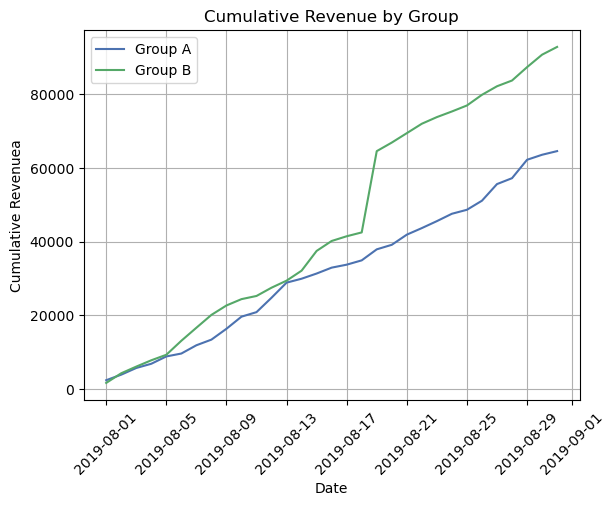

In [26]:
# Plotting cumulative revenue graph for Groups A and B
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Group A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Group B')

# Customizing the chart
plt.title('Cumulative Revenue by Group')
plt.xlabel('Date')
plt.ylabel('Cumulative Revenuea')

plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  

plt.show()

**Conclusion**:
- The cumulative revenue graph over the course of one year indicates that both groups showed growth, but with distinct patterns. During the first five days, the behaviors were similar, but Group B started to stand out in terms of growth after day 17, maintaining a higher performance than Group A until the end of the period.
- Group A experienced steady and consistent growth, whereas Group B showed a rapid increase after day 17, followed by stabilization. This suggests that Group B's performance might have been influenced by specific events that boosted sales during that period.

**2. Plot Average Cumulative Order Size per Group:**
- The goal is to observe how the average order size develops over time for each group

In [23]:
# Cumulative revenue and cumulative number of orders for Group A
cumulativeDataA = (df_orders_us[df_orders_us['group'] == 'A'].groupby('date').agg({'revenue': 'sum', 'transactionid': 'count'}).cumsum().reset_index())

# Obtaining the average order size (Group A)
cumulativeDataA['avg_order_size'] = (cumulativeDataA['revenue'] / cumulativeDataA['transactionid']).round(2)

# Cumulative revenue and cumulative number of orders for Group B
cumulativeDataB = (df_orders_us[df_orders_us['group'] == 'B'].groupby('date').agg({'revenue': 'sum', 'transactionid': 'count'}).cumsum().reset_index())

# Obtaining the average order size (Group B)
cumulativeDataB['avg_order_size'] =( cumulativeDataB['revenue'] / cumulativeDataB['transactionid']).round(2)

# Displaying new df
cumulativeDataB.head()

,date,revenue,transactionid,avg_order_size
0,2019-08-01,1620.0,21,77.14
1,2019-08-02,4243.8,45,94.31
2,2019-08-03,6050.6,61,99.19
3,2019-08-04,7767.9,78,99.59
4,2019-08-05,9262.9,101,91.71


**Conclusion:**
- The graph of the average cumulative order size revealed that Group B showed initial growth, with an exponential peak on day 17, followed by a slight decline, but maintaining an average higher than Group A for most of the period.

- Group A experienced a decline in the first five days, followed by brief growth and stabilization until the end of the period.

3. **Plot Relative Difference in Average Cumulative Order Size:** 
- The goal is to visualize how the average cumulative order size for Group B differs from Group A as the test progresses.

In [24]:
# Calculating the relative difference between the average order sizes of Group A and Group B
relative_difference = ((cumulativeDataB['avg_order_size'] - cumulativeDataA['avg_order_size']) / cumulativeDataA['avg_order_size']) * 100

# Displaying results
relative_difference.head()

0   -21.446029
1     7.500285
2    18.847352
3    22.617582
4    13.460349
Name: avg_order_size, dtype: float64

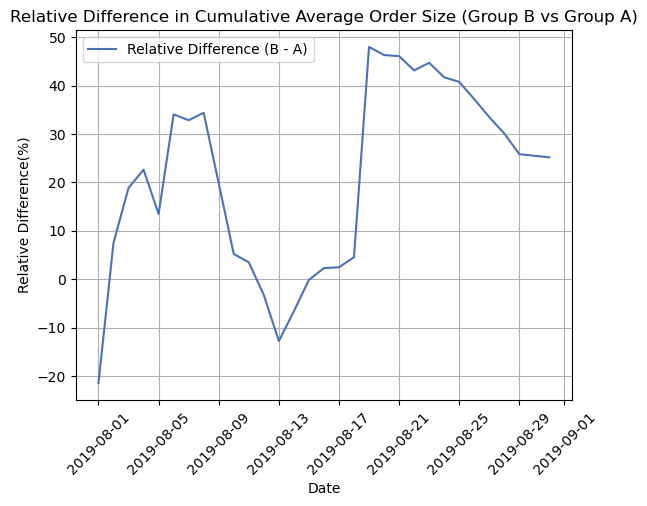

In [25]:
# Plotting the relative difference graph
plt.plot(cumulativeDataA['date'], relative_difference, label='Relative Difference (B - A)')

# Customizing the chart
plt.title('Relative Difference in Cumulative Average Order Size (Group B vs Group A)')
plt.xlabel('Date')
plt.ylabel('Relative Difference(%)')

# Customizing the chart
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

**Conclusion:**
- For most of the period, the value remained above 0%, indicating that Group B had a higher average cumulative order size than Group A. However, Group A performed better at the beginning and around day 13, when the graph showed that Group A's average cumulative order size surpassed that of Group B.

4. Calculate the Conversion Rate for Each Group as the Orders-to-Visits Ratio for Each Day. Plot the Daily Conversion Rates for Both Groups and Describe the Differences.
- This analysis aims to assess how effectively each group converts website visits into orders. By calculating the conversion rate (orders divided by visits), we can compare the performance of both groups in terms of conversion efficiency over time.

In [103]:
# Counting the number of visits by grouping by day and group
daily_visits = df_visits_us.groupby(['date', 'group']).agg({'visits': 'sum'}).reset_index()
# Counting the number of orders by grouping by day and group
daily_orders = df_orders_us.groupby(['date', 'group']).agg({'transactionid': 'count'}).reset_index()

# displaying the new df
daily_orders.head(3)

,date,group,transactionid
0,2019-08-01,A,24
1,2019-08-01,B,21
2,2019-08-02,A,20


In [104]:
# Merging daily_visits and daily_orders
conversion_data = pd.merge(daily_visits, daily_orders, on=['date', 'group'], how='left')

# Checking the new df (for missing values and ensuring all columns are present)
conversion_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           62 non-null     datetime64[ns]
 1   group          62 non-null     object        
 2   visits         62 non-null     int64         
 3   transactionid  62 non-null     int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.4+ KB


In [105]:
# Calculating the conversion rate
conversion_data['conversion_rate'] = ((conversion_data['transactionid'] / conversion_data['visits']) * 100).round(2)
conversion_data.head()

,date,group,visits,transactionid,conversion_rate
0,2019-08-01,A,719,24,3.34
1,2019-08-01,B,713,21,2.95
2,2019-08-02,A,619,20,3.23
3,2019-08-02,B,581,24,4.13
4,2019-08-03,A,507,24,4.73


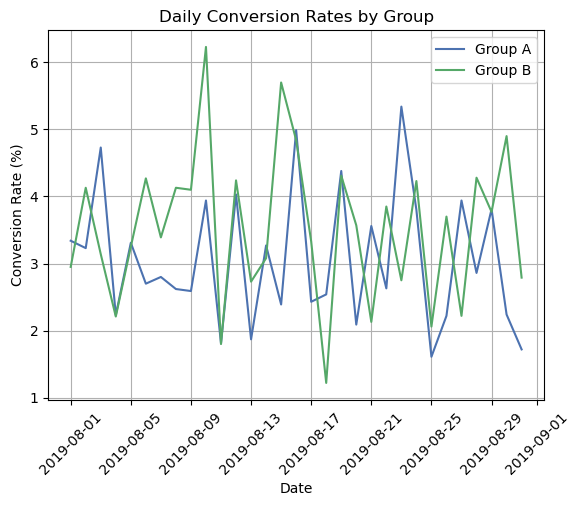

In [131]:
# Splitting Groups A and B
conversion_A = conversion_data[conversion_data['group'] == 'A']
conversion_B = conversion_data[conversion_data['group'] == 'B']

# Plotting the conversion rates
plt.plot(conversion_A['date'], conversion_A['conversion_rate'], label='Group A')
plt.plot(conversion_B['date'], conversion_B['conversion_rate'], label='Group B')

# Customizing the plot
plt.title('Daily Conversion Rates by Group')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')

plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()


**Conclusion**:
- It was observed that there is no clear pattern between the two groups due to the high variation in the values of both. However, overall, we can note that Group A had a conversion rate ranging from 1.5% to 5.5%, while the values for Group B fluctuated between 1% and 6.5%.

5. Plot the Relative Difference in Cumulative Conversion Between Group B and Group A.
- This analysis aims to compare the cumulative conversion performance of both groups over time. By plotting the relative difference, we can clearly see how Group B's conversion rate compares to Group A's, which may help identify which group is performing better in terms of converting visits into orders over the entire period.

In [107]:
# For cumulative visits
cumulative_visits = df_visits_us.groupby(['date', 'group'], as_index=False).agg({'visits': 'sum'})
cumulative_visits['cumulative_visits'] = cumulative_visits.groupby(['group'])['visits'].cumsum()

# For cumulative orders
cumulative_orders = df_orders_us.groupby(['date', 'group'], as_index=False).agg({'transactionid': 'count'})
cumulative_orders['cumulative_orders'] = cumulative_orders.groupby(['group'])['transactionid'].cumsum()

# Checking results
print(cumulative_visits.head(3))
print()
print(cumulative_orders.head(3))


        date group  visits  cumulative_visits
0 2019-08-01     A     719                719
1 2019-08-01     B     713                713
2 2019-08-02     A     619               1338

        date group  transactionid  cumulative_orders
0 2019-08-01     A             24                 24
1 2019-08-01     B             21                 21
2 2019-08-02     A             20                 44


In [108]:
# Merging the cumulative visits and orders data
cumulative_data = pd.merge(cumulative_visits, cumulative_orders, on=['date', 'group'], how='left')

# Displaying results
cumulative_data.head(3)

,date,group,visits,cumulative_visits,transactionid,cumulative_orders
0,2019-08-01,A,719,719,24,24
1,2019-08-01,B,713,713,21,21
2,2019-08-02,A,619,1338,20,44


In [109]:
# Calculating the cumulative conversion
cumulative_data['cumulative_conversion'] = ((cumulative_data['transactionid'] / cumulative_data['visits']) * 100).round(2)

# Displaying results
cumulative_data.head(3)

,date,group,visits,cumulative_visits,transactionid,cumulative_orders,cumulative_conversion
0,2019-08-01,A,719,719,24,24,3.34
1,2019-08-01,B,713,713,21,21,2.95
2,2019-08-02,A,619,1338,20,44,3.23


In [110]:
# Selecting Groups A and B
cumulative_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_B = cumulative_data[cumulative_data['group'] == 'B']

# Calculating the relative difference in cumulative conversion
relative_difference = pd.merge(cumulative_A[['date', 'cumulative_conversion']],     cumulative_B[['date', 'cumulative_conversion']], on='date', suffixes=('_A', '_B'))

# Displaying results
relative_difference.head(3)

,date,cumulative_conversion_A,cumulative_conversion_B
0,2019-08-01,3.34,2.95
1,2019-08-02,3.23,4.13
2,2019-08-03,4.73,3.14


In [111]:
# Plotting the chart # Calculating the relative difference
relative_difference['relative_difference'] = (((relative_difference['cumulative_conversion_B'] - relative_difference['cumulative_conversion_A']) /relative_difference['cumulative_conversion_A']) * 100).round(2)

# Displaying results
relative_difference.head(3)

,date,cumulative_conversion_A,cumulative_conversion_B,relative_difference
0,2019-08-01,3.34,2.95,-11.68
1,2019-08-02,3.23,4.13,27.86
2,2019-08-03,4.73,3.14,-33.62


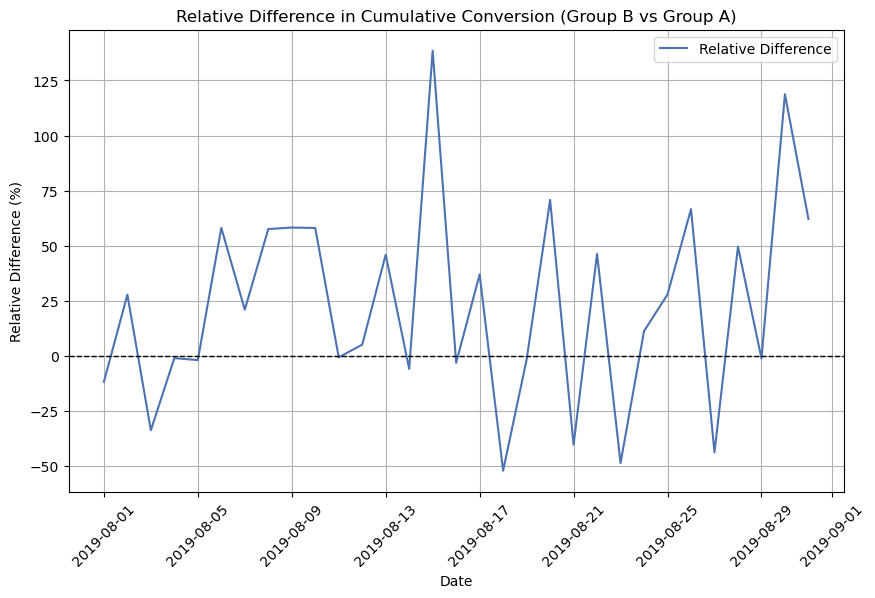

In [130]:
# Plotting 
plt.figure(figsize=(10, 6))
plt.plot(relative_difference['date'], relative_difference['relative_difference'], label='Relative Difference')

# Customizing the plot
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Linha de referência em 0%
plt.title('Relative Difference in Cumulative Conversion (Group B vs Group A)')
plt.xlabel('Date')
plt.ylabel('Relative Difference (%)')

plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

**Conclusion:**:
- Group B showed higher conversion than Group A until day 17, as indicated by the positive values. After that, there was significant fluctuation, suggesting changes in behavior or external factors affecting conversion. Towards the end of the period, Group B regained its upward trend. Investigating the reasons behind these fluctuations is key to identifying opportunities or strategies that could be replicated.

6. Calculate the 95th and 99th Percentiles for the Number of Orders Per User and Define the Point at Which a Data Point Becomes an Anomaly.
- The goal is to calculate the 95th and 99th percentiles for the number of orders per user and identify the threshold for anomalies, helping to flag outliers or unusual user behavior for further analysis.

In [113]:
# Counting the number of orders per user
orders_per_user = df_orders_us.groupby('visitorid')['transactionid'].count().reset_index()
orders_per_user.columns = ['visitorid', 'orders_count']

# Displaying results
orders_per_user.head(3)

,visitorid,orders_count
0,5114589,1
1,6958315,1
2,8300375,2


In [129]:
# Calculating the 95th and 99th Percentiles
percentile = np.percentile(orders_per_user['orders_count'], [95, 99])

# Displaying percentis
print(f"The 95th percentile is {percentile[0]} orders and the 99th percentile is {percentile[1]} orders.")

The 95th percentile is 2.0 orders and the 99th percentile is 4.0 orders.


7. Create a Scatter Plot of Order Prices
- The goal of this task is to create a scatter plot of order prices to visualize the distribution and relationship between order values. This will help identify any trends, clusters, or outliers in the data, providing insights into pricing patterns and highlighting potential anomalies or unusual price points.

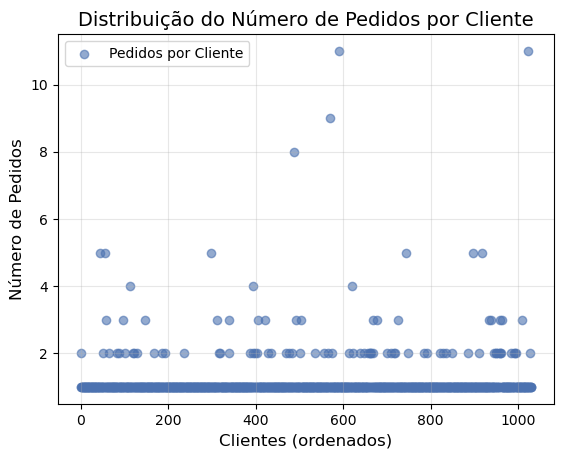

In [ ]:
x_values = pd.Series(range(0,len(orders_per_user)))

# Plotting the Graph of Number of Orders per Customer
plt.scatter(x_values, orders_per_user['orders_count'], alpha=0.6, label='Pedidos por Cliente')

# Customizing the plot
plt.title('Distribution of Number of Orders per Customer', fontsize=14)
plt.xlabel('Clients', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.legend()
plt.grid(alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

**Conclusion:**:
- The graph and percentile calculations suggest that the point at which the data becomes anomalous occurs at the 99th percentile. Therefore, any customer with more than 4 orders can be considered anomalous.

8. Calculate the 95th and 99th Percentiles of Order Prices. Define the Point at Which a Data Point Becomes an Anomaly.

In [116]:
# Checking df
df_orders_us.head(3)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A


In [128]:
#  Calculating the 95th and 99th Percentiles
percentile = np.percentile(df_orders_us['revenue'], [95, 99])

# Displaying the Percentiles
print(f"The 95th percentile is {percentile[0].round(2)} dollars and the 99th percentile is {(percentile[1]).round(2)} dollars")

The 95th percentile is 435.54 dollars and the 99th percentile is 900.9 dollars


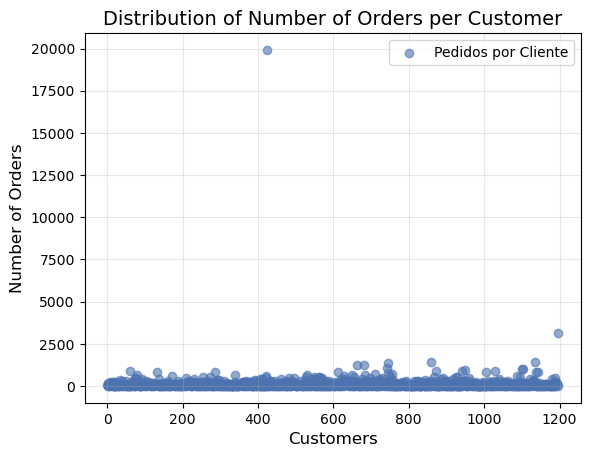

In [127]:
x_values = pd.Series(range(0,len(df_orders_us)))

# Plotting the Graph of Number of Orders per Customer
plt.scatter(x_values, df_orders_us['revenue'], alpha=0.6, label='Pedidos por Cliente')

# Customizing the plot
plt.title('Distribution of Number of Orders per Customer', fontsize=14)
plt.xlabel('Customers', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.legend()
plt.grid(alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.show()

**Conclusion:** 
- The graph and the percentile calculations suggest that the point at which the data becomes anomalous is at the 99th percentile, as any customer who spends more than $900.00 per order would be considered anomalous.

9. Find the Statistical Significance of the Conversion Difference Between the Groups Using Raw Data.
- The goal of this process is to determine whether there is a statistically significant difference in the conversion rates between Group A and Group B using raw data. By performing a hypothesis test, we aim to assess if the observed difference in conversion rates is likely due to random chance or reflects a true underlying difference in performance between the two groups.

In [119]:
# Counting unique users who made a purchase in group A
ordersByUsersA = (df_orders_us[df_orders_us['group'] == 'A'].groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique}))

# Renaming columns
ordersByUsersA.columns = ['visitorid', 'transactionid']

# Counting unique users who made a purchase in group B
ordersByUsersB = (df_orders_us[df_orders_us['group'] == 'B'].groupby('visitorid', as_index=False).agg({'transactionid': pd.Series.nunique}))

# Renaming columns
ordersByUsersB.columns = ['visitorid', 'transactionid']

# Displaying results
ordersByUsersA.head(3)

,visitorid,transactionid
0,8300375,1
1,11685486,1
2,54447517,1


In [ ]:
# Selecting the sample for group A
sampleA = pd.concat([ordersByUsersA['transactionid'],pd.Series(0, index=np.arange(df_visits_us[df_visits_us['group'] == 'A']['visits'].sum() - len(ordersByUsersA)), name='transactionid')], axis=0)

# Selecting the sample for group B
sampleB = pd.concat([ordersByUsersB['transactionid'],pd.Series(0, index=np.arange(df_visits_us[df_visits_us['group'] == 'B']['visits'].sum() - len(ordersByUsersB)), name='transactionid')], axis=0)

# Displaying results
print("P-value with raw data: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Statistical difference in the conversion rate with raw data: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

P-value with raw data:0.017
Statistical difference in the conversion rate with raw data:0.138


**Conclusion:**
Based on the data, there is a statistically significant difference between the conversion rates of groups A and B. The first line of the result provides the p-value, 0.017, which is less than 0.05. Therefore, we can reject the null hypothesis, which assumes that there is a statistically significant difference in conversion between the groups. However, the relative gain of group B is 13.8% higher than that of group A.

10. Find the statistical significance of the difference in average order size between the groups using the raw data. Draw conclusions and make conjectures.

In [121]:
# Displaying df
df_orders_us.head()

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [122]:
print('P-value with raw data{0:.3f}'.format(stats.mannwhitneyu(df_orders_us[df_orders_us['group']=='A']['revenue'], df_orders_us[df_orders_us['group']=='B']['revenue'])[1]))

print('Statistical difference in the conversion rate with raw data: {0:.3f}'.format(df_orders_us[df_orders_us['group']=='B']['revenue'].mean()/df_orders_us[df_orders_us['group']=='A']['revenue'].mean()-1))

P-value with raw data0.692
Statistical difference in the conversion rate with raw data: 0.252


**Conclusion:**
Using the raw data, we can observe that the p-value is considerably higher than 0.05, so we *cannot* reject the null hypothesis that there is no statistically significant difference in the average order size between the groups. Furthermore, the average order volume of group B is 25.2% higher than that of group A.

11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Draw conclusions and make conjectures.

In [123]:
# Given the filtered data, the data without anomalies  
# Anomaly defined as those with more than 4 orders or with an order greater than $900

# Discovering the number of anomalous users
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactionid'] > 4]['visitorid'], ordersByUsersB[ordersByUsersB['transactionid'] > 4]['visitorid']], axis = 0)

usersWithExpensiveOrders = df_orders_us[df_orders_us['revenue'] > 900]['visitorid']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

# Displaying results
print(abnormalUsers.head(5))
print(abnormalUsers.shape)


1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorid, dtype: int64
(15,)


In [124]:
# Calculating the statistical significance of the differences in conversion between the two groups using a filter
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['transactionid'],pd.Series(0, index=np.arange(df_visits_us[df_visits_us['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionid'])),name='transactionid')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['transactionid'],pd.Series(0, index=np.arange(df_visits_us[df_visits_us['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionid'])),name='transactionid')],axis=0)

# Applying the Mann-Whitney statistical test
print("P-value with filtered data: {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Statistical difference in the conversion rate with filtered data: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value with filtered data: 0.014
Statistical difference in the conversion rate with filtered data: 0.153


Conclusion: The p-value is below 0.05, which means that the conversion between the groups is statistically significant. In other words, we have evidence to *reject* the null hypothesis that assumes the groups have equal conversion rates. Furthermore, the relative difference between the conversion rates indicates that group B had a 15.3% higher rate than group A.

12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Draw conclusions and make conjectures.

In [125]:
# Displaying df
df_orders_us.head(1)

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B


In [126]:
# p-value (with filtered data)
print('P-value with filtered data: {0:.3f}'.format(stats.mannwhitneyu(
    df_orders_us[np.logical_and(
        df_orders_us['group']=='A', np.logical_not(df_orders_us['visitorid'].isin(abnormalUsers)))]['revenue'],
        df_orders_us[np.logical_and(
            df_orders_us['group']=='B',np.logical_not(df_orders_us['visitorid'].isin(abnormalUsers)))]['revenue'])[1]))

# Relative difference in average order size with filtered data
print('Statistical difference in the conversion rate with filtered data:{0:.3f}'.format(
    df_orders_us[np.logical_and(df_orders_us['group']=='B',np.logical_not(df_orders_us['visitorid'].isin(abnormalUsers)))]['revenue'].mean()/df_orders_us[np.logical_and(
        df_orders_us['group']=='A',
        np.logical_not(df_orders_us['visitorid'].isin(abnormalUsers)))]['revenue'].mean() - 1))

P-value with filtered data: 0.819
Statistical difference in the conversion rate with filtered data:-0.006


**Conclusion**:
The p-value greater than 0.05 indicates that there is *no* statistically significant difference in the average order size between groups A and B. This means that there is *not* enough evidence to reject the null hypothesis (that the average order sizes are equal between the groups).  
The relative difference of -0.006 indicates that the average order size in group B is 0.6% smaller than in group A, but this difference is not significant between the groups.

13. Make a decision based on the test results. The possible decisions are:  
- Stop the test, consider one of the groups the leader.  
-  Stop the test, conclude that there is no difference between the groups.  
- Continue the test.

Based on the tests conducted, it is recommended to conclude the test, as group B outperformed group A in several aspects. Although the tests with raw and filtered data yielded numerically different values, some conclusions were consistent:

- Both tests indicated evidence to reject the null hypothesis that assumes no statistically significant difference in conversion between the groups. The statistical difference in conversion rates was 13.8% with raw data and 15.3% with filtered data.
- Both tests concluded that there is not enough evidence to reject the null hypothesis that the average order sizes are equal between the groups.

However, the relative difference in average order sizes showed very discrepant results: with raw data, the difference was 25.2% in favor of group B, while with filtered data it was only 0.6% in favor of group A. This highlights how outlier values can significantly influence the results of the analysis. In conclusion, the ideal approach is to use filtered data to avoid conclusions based on distorted information.